### Importing all necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import datetime
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Load Restaurants and Reviews data

In [2]:
restaurants = pd.read_csv('data/restaurants.csv')
reviews = pd.read_csv('data/reviews.csv')

### Question 1
Head of Customer Service: “Our ratings are gradually improving, and we will soon reach 4.5/5.”

Part A: Does the data support the statement made by the Head of Customer Service?

Part B: Is this statement valid across all states?

Hint: Construct a plot with year on the x-axis and average rating received on the primary y-axis. Plot a bar chart of number of ratings received on the secondary y- axis.


In [3]:
# Extract year from date column and create new column using datetime
reviews['year'] = pd.DatetimeIndex(reviews['date']).year

In [4]:
# Join the two tables on business_id
joined = pd.merge(reviews, restaurants, on=['business_id'])
joined.drop(columns=['Unnamed: 0_x','Unnamed: 0_y'], inplace = True)

In [5]:
# Create a filter for reviews on only subway. Group reviews by year and find the average
sub = joined[joined['name'].str.contains('Subway')]
sub_average_ratings_by_year = sub.groupby(sub['year'])['stars'].mean()

# Group reviews by year and find the sum of ratings
sub_total_ratings_by_year = sub.groupby(sub['year'])['stars'].count()

In [6]:
# Convert first column into a list to use for x-axis (years)
sub_years = sub_average_ratings_by_year.index.get_level_values(0).tolist()

### Question 1 Part A

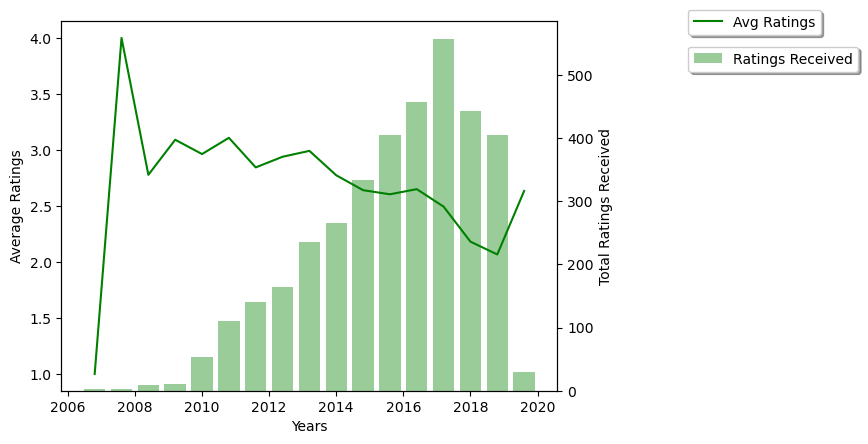

<Figure size 1000x1000 with 0 Axes>

In [7]:
# Setting up for a primary axis (average rating) and secondary axis (total ratings received)
fig, ax1, = plt.subplots()
plt.figure(figsize=(10,10))

# Plotting the line chart
ax1.plot(sub_years, sub_average_ratings_by_year, color='green', label="Avg Ratings")
ax1.set_xlabel('Years')
ax1.set_xticklabels([int(x) for x in ax1.get_xticks().tolist()])
ax1.set_ylabel('Average Ratings')
ax1.legend(loc='upper left', bbox_to_anchor=(1.25, 1.05),
          ncol=3, fancybox=True, shadow=True)

# Plotting the bar chart
ax2 = ax1.twinx()
ax2.bar(sub_years, sub_total_ratings_by_year, color='green', alpha=0.4, label="Ratings Received")
ax2.set_ylabel('Total Ratings Received')
ax2.legend(loc='upper left', bbox_to_anchor=(1.25, .95),
          ncol=3, fancybox=True, shadow=True)

plt.show();

### Question 1 Part B

In [8]:
# Group reviews by state and find the average ratings
sub_average_ratings_by_state = sub.groupby(['state','year'])['stars'].mean()

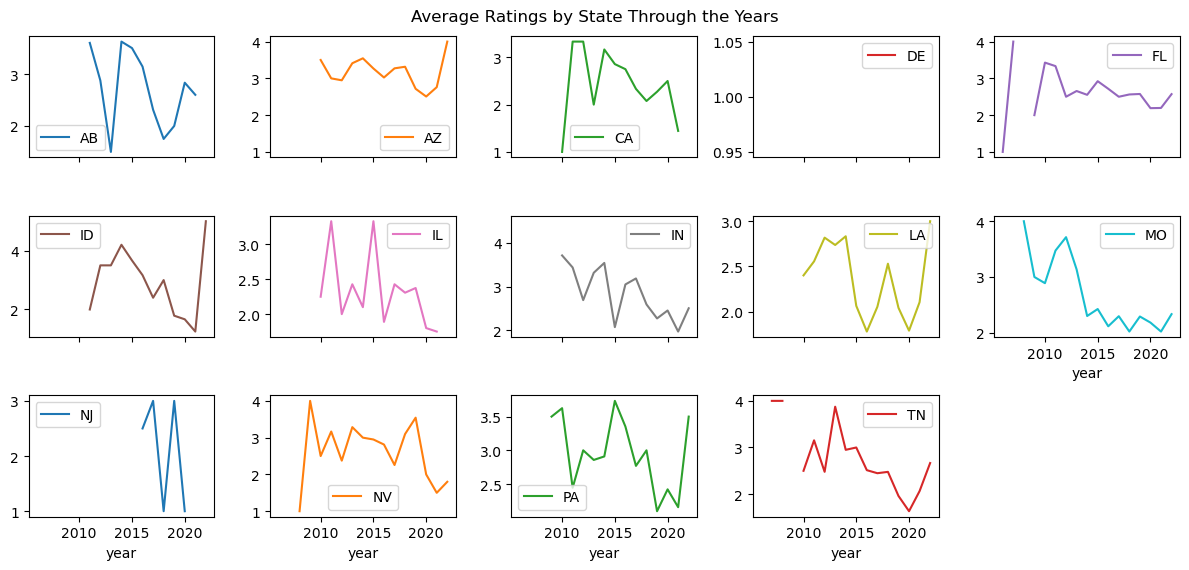

In [9]:
# Unstack average_ratings_by_state which is a multi-level dataframe on level=0 (state) and generate a line plot
collection = sub_average_ratings_by_state.unstack(level=0).plot(kind='line', subplots=True, rot=0, figsize=(12,9),
                                                   layout=(5,5))
plt.suptitle('Average Ratings by State Through the Years')
# tight_layout() adjust the padding between and around subplots.
plt.tight_layout()

### Part A Response

> The data does not support the statement made by the Head of Customer Service. 
In fact, average ratings by year show average ratings declining during the same timeline. 
We can also see the total ratings received increase during those years.

### Part B Response

>The statement by the Head of Customer Service is not valid across all states. 
We can see that a handful of states are trending down or stagnant with their ratings: 
AB, CA, FL, IL, IN, MO, NJ, NV, and TN.

> Other states like AZ, ID, LA, and PA seem poised to break 3.5 or even reach 4.5 but their trajectory does not indicate a gradual improvement or a slow and steady increase, but rather a rapid ascent after 2021.

> Overall, the data and visualizations do not fully support the statement by the Head of Customer Service and may actually be more suited to support the opposite conclusion.

### Question 2 
Head of Store Operations: “Sandwiches are a tricky business. All sandwich chains suffer from poor customer ratings.”

Does the data support the statement made by the Head of Store Operations? 

Part A: Are sandwiches the only tricky business?

Hint: Identify one or two national competitors of Subway. Create a plot to compare 
the mean and standard deviation of reviews received by Subway with its competitors.


### Question 2 Part A

In [10]:
# Create dfs for the identified Subway competitors: Chipotle Mexican Grill, Panera Bread, Domino's Pizza, Taco Bell, Wendy's
cmg = joined[joined['name'].str.contains('Chipotle Mexican Grill')]
pnb = joined[joined['name'].str.contains('Panera Bread')]
dpa = joined[joined['name'].str.contains('Domino\'s Pizza')]
tbe = joined[joined['name'].str.contains('Taco Bell')]
wen = joined[joined['name'].str.contains('Wendy\s')]

In [11]:
# Find average by year for the two competitors
cmg_average_ratings_by_year = cmg.groupby(cmg['year'])['stars'].mean()
pnb_average_ratings_by_year = pnb.groupby(pnb['year'])['stars'].mean()
dpa_average_ratings_by_year = dpa.groupby(dpa['year'])['stars'].mean()
tbe_average_ratings_by_year = tbe.groupby(tbe['year'])['stars'].mean()
wen_average_ratings_by_year = wen.groupby(wen['year'])['stars'].mean()
sub_average_ratings_by_year = sub.groupby(sub['year'])['stars'].mean()

In [12]:
# Find averages
sub_mean = sub['stars'].mean()
cmg_mean = cmg['stars'].mean()
pnb_mean = pnb['stars'].mean()
dpa_mean = dpa['stars'].mean()
tbe_mean = tbe['stars'].mean()
wen_mean = dpa['stars'].mean()

# Find standard deviations
sub_std = sub['stars'].std()
cmg_std = cmg['stars'].std()
pnb_std = pnb['stars'].std()
dpa_std  = dpa['stars'].std()
tbe_std = tbe['stars'].std()
wen_std = dpa['stars'].std()

# Make dataframe
df = pd.DataFrame({
    'Restaurant': ['Subway', 'Chipotle Mexican Grill', 'Panera Bread', 'Domino\'s Pizza', 'Taco Bell', 'Wendy\'s'],
    'Mean': [sub_mean, cmg_mean, pnb_mean, dpa_mean, tbe_mean, wen_mean],
    'Std Dev': [sub_std, cmg_std, pnb_std, dpa_std, tbe_std, wen_std]})

# Plot table
display(df)

,Restaurant,Mean,Std Dev
0,Subway,2.569418,1.639710
1,Chipotle Mexican Grill,2.453592,1.539531
2,Panera Bread,2.685201,1.477008
3,Domino's Pizza,2.154477,1.582590
4,Taco Bell,2.073197,1.506025
5,Wendy's,2.154477,1.582590


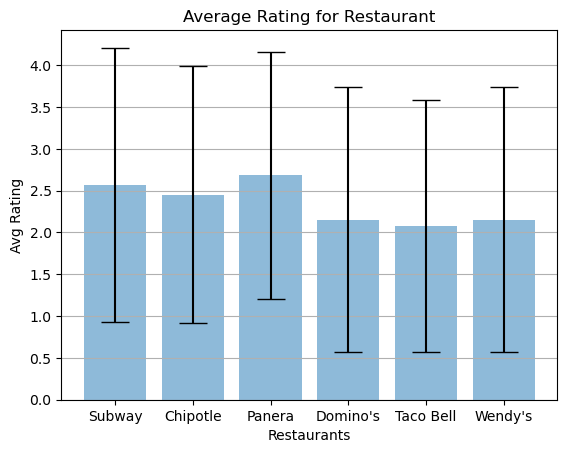

<Figure size 1000x1000 with 0 Axes>

In [13]:
# Create lists for the plot
restaurant = ['Subway', 'Chipotle', 'Panera', 'Domino\'s', 'Taco Bell', 'Wendy\'s']
x_pos = np.arange(len(restaurant))
means = [sub_mean, cmg_mean, pnb_mean, dpa_mean, tbe_mean, wen_mean]
error = [sub_std, cmg_std, pnb_std, dpa_std, tbe_std, wen_std]

# Chart elements
fig, ax = plt.subplots()
plt.figure(figsize=(10,10))
ax.bar(x_pos, means, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_xlabel('Restaurants')
ax.set_ylabel('Avg Rating')
ax.set_xticks(x_pos)
ax.set_xticklabels(restaurant)
ax.set_title('Average Rating for Restaurant')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.show();

In [14]:
# Extract years for each competitor
cmg_years = cmg_average_ratings_by_year.index.get_level_values(0).tolist()
pnb_years = pnb_average_ratings_by_year.index.get_level_values(0).tolist()
dpa_years = dpa_average_ratings_by_year.index.get_level_values(0).tolist()
tbe_years = tbe_average_ratings_by_year.index.get_level_values(0).tolist()
wen_years = wen_average_ratings_by_year.index.get_level_values(0).tolist()
sub_years = sub_average_ratings_by_year.index.get_level_values(0).tolist()

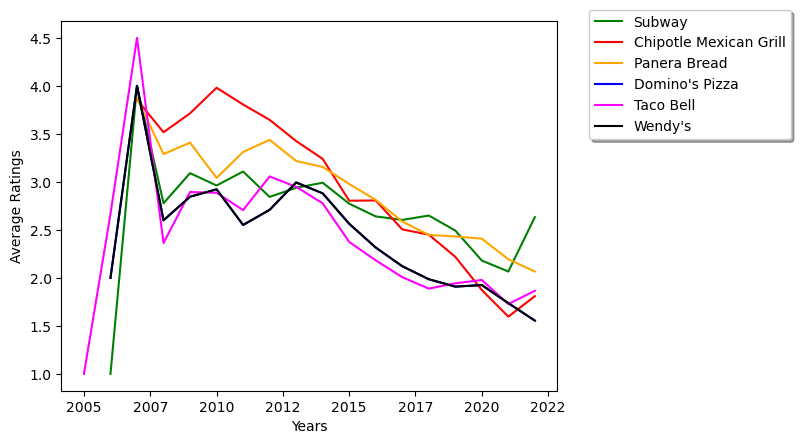

In [15]:
# Graph all competitors - time series line chart to observe average ratings
fig, ax1, = plt.subplots()

# Chart elements
plt.plot(sub_years, sub_average_ratings_by_year, color='green', label="Subway")
plt.plot(cmg_years, cmg_average_ratings_by_year, color='red', label="Chipotle Mexican Grill")
plt.plot(pnb_years, pnb_average_ratings_by_year, color='orange', label="Panera Bread")
plt.plot(dpa_years, dpa_average_ratings_by_year, color='blue', label="Domino\'s Pizza")
plt.plot(tbe_years, tbe_average_ratings_by_year, color='magenta', label="Taco Bell")
plt.plot(dpa_years, dpa_average_ratings_by_year, color='black', label="Wendy\'s")

plt.xlabel('Years')
plt.ylabel('Average Ratings')
ax1.set_xticklabels([int(x) for x in ax1.get_xticks().tolist()])
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.05),
           fancybox=True, shadow=True);

#### Part A Response

> There is data to suggest that sandwiches are not the only tricky business.  
By plotting the mean of Subway’s national competitors along with its close peers on a bar plot with error bars and a table showcasing the mean and standard deviation of various restaurants, we can observe a theme of poor customer ratings for  multiple businesses such as taco and pizza also suffering from poor ratings.

> In the bar graph of Subway’s competitors, we can see average ratings of around 2.0 - 2.5 stars which suggests poor customer performance.

> In the table that shows Subway’s competitor’s mean and standard deviation, we find that the sandwich business is 
not the only “tricky business.”

> In the time series of average ratings for Subway’s competitors, we can observe the theme of poor customer ratings in the sandwich, taco, and pizza businesses. Although, it's important to note that this data may not be an accurate representation of true performance because of selection bias. Further investigation is needed alongside these chart to confirm statements with greater certainty.



### Question 3

Head of Social Media: “The goal of 4.5/5 is unreasonable for national chains like us. Only small, local, and boutique restaurants can achieve such high ratings.”

Part A: Does the data support the statement made by the Head of Social Media?

Part B: Is it true that average rating decreases as the size of restaurant increases?

Hint: Categorize restaurants with a presence in more than 50 cities as national chains and a presence in only one city as local. Construct a plot to compare ratings received by national chains and local chains.


### Question 3 Part A

In [16]:
# Categorize restaurants with greater than 50 cities as national
national = restaurants.groupby(restaurants['name'])['city'].count() > 50
national = national.to_frame().reset_index()
national['city'].value_counts()
national.columns = ['name','national']

# Categorize restaurants present in only one city as. local
local = restaurants.groupby(restaurants['name'])['city'].count() == 1
local = local.to_frame().reset_index()
local.columns = ['name','local']



In [17]:
# Join national and local as boolean columns in original joined df
nl = national.merge(local, how ='inner', on = 'name')
restaurants_nl = restaurants.merge(nl, how = 'inner', on = 'name')

# Merge back with reviews
merged = pd.merge(reviews, restaurants_nl, how = 'left', on=['business_id']).reset_index()
#Remove unwanted columns
merged.drop(columns=['Unnamed: 0_x','Unnamed: 0_y', 'index'], inplace = True)

# Create a new column that is collectively exhaustive/mutually exclusive of size_category (national, local, and boutique)
merged.loc[merged['national'] == True, 'size_category'] = 'national'
merged.loc[merged['local'] == True, 'size_category'] = 'local'
merged['size_category'] = merged['size_category'].fillna(value='boutique')

In [18]:
# Calculate averages for national and local restaurants for bar chart
bar_chart = merged.groupby('size_category')['stars'].mean().to_frame().reset_index()
bar_chart.columns = ['size_category','average_rating']

In [19]:
z = pd.Series(merged['size_category'].value_counts()).to_frame().reset_index()

In [20]:
# Make relative frequency table to see if there is overrepresentation of a specific size_category
z = pd.Series(merged['size_category'].value_counts()).to_frame().reset_index()
total = z['size_category'].sum()
local_count = z['size_category'][0]
national_count = z['size_category'][1]
boutique_count = z['size_category'][2]

local_count_per = round((local_count/total * 100),2)
national_count_per = round((national_count/total * 100),2)
boutique_count_per = round((boutique_count/total * 100),2)


# Make dataframe
relative_freq_df = pd.DataFrame({
    'Size Category': ['Local', 'National', 'Boutique'],
    'Count': [local_count, national_count, boutique_count],
    'Relative Frequency %': [local_count_per, national_count_per, boutique_count_per]})

#display relative_freq_df
relative_freq_df

,Size Category,Count,Relative Frequency %
0,Local,269321,62.21
1,National,146617,33.87
2,Boutique,16983,3.92


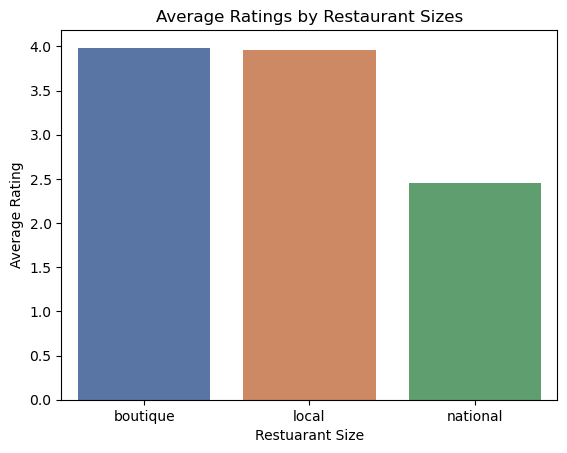

In [21]:
# Create bar chart to compare ratings received by national chains, local chains, and other
sns.barplot(data = bar_chart, x = 'size_category', y = 'average_rating', palette = 'deep')
plt.title("Average Ratings by Restaurant Sizes")
plt.xlabel('Restuarant Size')
plt.ylabel('Average Rating');

### Question 3 Part B

In [22]:
# Prepare x and y variables for new dataframe
x_df = restaurants.groupby('name')['city'].count().to_frame().reset_index()
x_df.columns = ['name', 'restaurant_size']

y_df = merged.groupby('name')['stars'].mean().to_frame().reset_index()
y_df.columns = ['name', 'average ratings']

In [23]:
# Merge two dataframes together to have a df with name, count, and average rating
size_and_ratings = pd.merge(x_df, y_df, how = 'inner', on=['name']).reset_index()
size_and_ratings.drop(columns=['index'], inplace = True)

In [24]:
size_and_ratings.head()

,name,restaurant_size,average ratings
0,1000 Figs,1,4.490683
1,101 Taiwanese Cuisine,1,4.012626
2,10th Street Baking,1,4.142857
3,12 South Bistro,1,2.266667
4,120 West Bar & Grill,1,3.545455


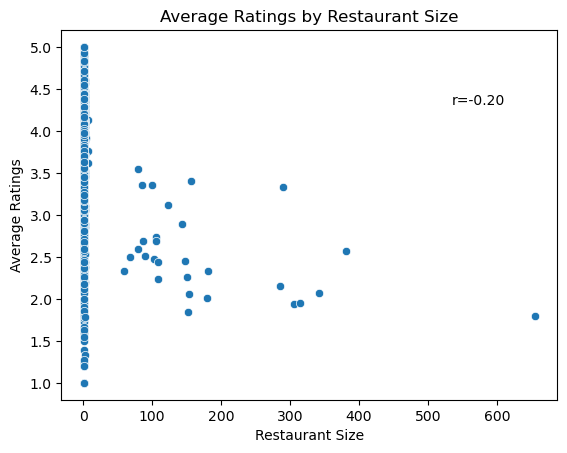

In [25]:
# Create scatterplot to explore relationship between restaurant size and average ratings
sns.scatterplot(data = size_and_ratings, x = 'restaurant_size', y = 'average ratings', palette = 'deep')

# Labels for scatterplot
plt.title('Average Ratings by Restaurant Size')
plt.xlabel('Restaurant Size')
plt.ylabel('Average Ratings')

# call the scipy function for pearson correlation
r, p = sp.stats.pearsonr(x = size_and_ratings['restaurant_size'], y = size_and_ratings['average ratings'])
# Annotate the pearson correlation coefficient text to 2 decimal places
plt.text(.75, .8, 'r={:.2f}'.format(r), transform=ax.transAxes)

plt.show();

In [26]:
sample_df = size_and_ratings.merge(nl, how = 'inner', on = 'name')

In [27]:
sample_df.loc[sample_df['national'] == True, 'size_category'] = 'national'
sample_df.loc[sample_df['local'] == True, 'size_category'] = 'local'
sample_df['size_category'] = sample_df['size_category'].fillna(value='other')
sample_df.drop(columns=['national','local'], inplace = True)

In [28]:
# Generate random samples based on size_category
a = sample_df[sample_df['size_category'] == 'local']
b = sample_df[sample_df['size_category'] == 'national']
c = sample_df[sample_df['size_category'] == 'other']

local_sample = a.sample(n = 25)
national_sample = b.sample(n = 25)
boutique_sample = c.sample(n = 25)

In [29]:
random_sample = pd.concat([local_sample, national_sample, boutique_sample])

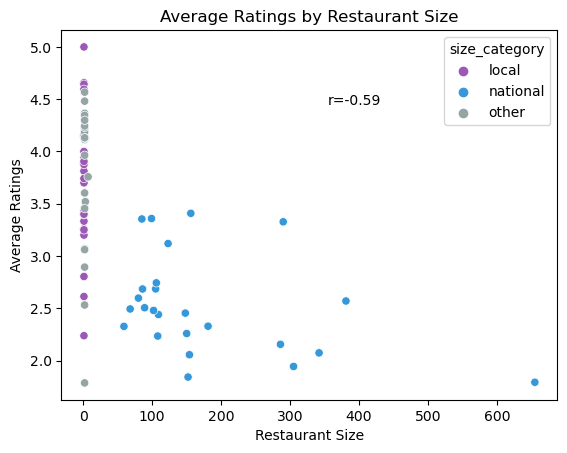

In [30]:
sns.scatterplot(data = random_sample, x = 'restaurant_size', 
                y = 'average ratings', palette=dict(local="#9b59b6", national="#3498db", other="#95a5a6"), 
                hue='size_category', legend=True)

# Labels for scatterplot
plt.title('Average Ratings by Restaurant Size')
plt.xlabel('Restaurant Size')
plt.ylabel('Average Ratings')

# call the scipy function for pearson correlation
r, p = sp.stats.pearsonr(x = random_sample['restaurant_size'], y = random_sample['average ratings'])

# Annotate the pearson correlation coefficient text to 2 decimal places
plt.text(.5, .8, 'r={:.2f}'.format(r), transform=ax.transAxes);

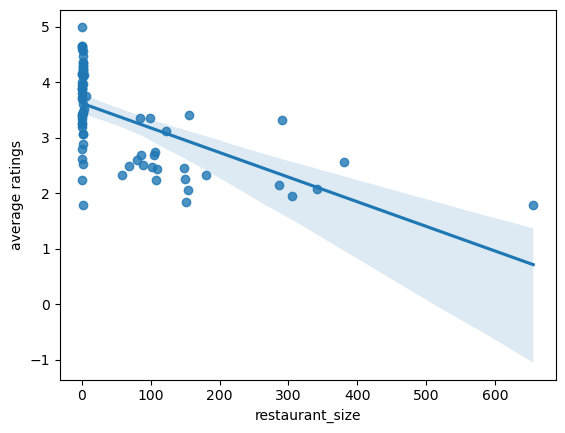

In [31]:
sns.regplot(x="restaurant_size", y="average ratings", data=random_sample);

#### Part A Reponse
> While the bar chart indicates that the statement by the Head of Social Media is true, further examination such as the plotting of a scatter plot is required to explore if there is a strong relationship between restaurant size and average ratings. 

> There is also an issue of overrepresentation of local restaurants over boutique and 
national-sized restaurants exist as can be seen by this relative frequency table:

> National-sized restaurants represent 33.87% of the reviews in the dataset, while local restaurants represent 62.21% (nearly double). Boutique restaurants, who have a presence in between 1 and 50 cities represent 3.92% and have a similar average
rating to local restaurants. This inequality in relative frequencies results in overrepresentation.

#### Part B Response 
> After a closer investigation of the relationship between restaurant size and average ratings, we find that there is a weak negative correlation (r = -0.2) or lack of clear evidence to support that average rating decreases as the size of restaurant increases. We also understand that this may not be an accurate depiction of the situation because as I noted in Part A, there is overrepresentation.

> To made the categories more balanced, I used a random sampling of 25 restaurants from each size category and created a scatter plot. Here we can see that the negative correlation is stronger at r = -0.64. However this adjustment assumes that the sample taken is truly representative of the size category. While there is some evidence based on the two methods and accepting some assumptions about the dataset, we would need to further investigate sample representation to definitively make that statement.

### Question 4
Chief Data Scientist: “It is well known that customers make the effort to give a rating only when they are either extremely angry or absolutely delighted with the service. So online ratings are not reliable.”

Part A: Does the data support the statement made by the Chief Data Scientist? 

Part B: Is the statement true across all years from 2018 to 2021? 

Hint: Create a plot with the ratings on the x-axis and the number of reviews with that rating on the y-axis.


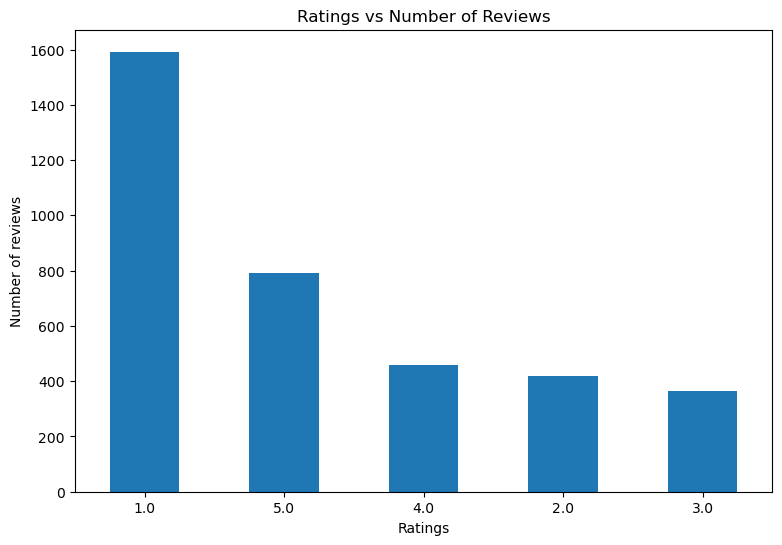

In [32]:
ratings = sub['stars'].value_counts()

ratings.plot(kind = 'bar', title = "Ratings vs Number of Reviews", 
             xlabel = "Ratings", ylabel = 'Number of reviews', rot = 360, figsize=(9,6))

plt.show();

In [33]:
# Number of reviews for each rating
ratings.to_frame()

,stars
1.0,1592
5.0,792
4.0,457
2.0,417
3.0,365


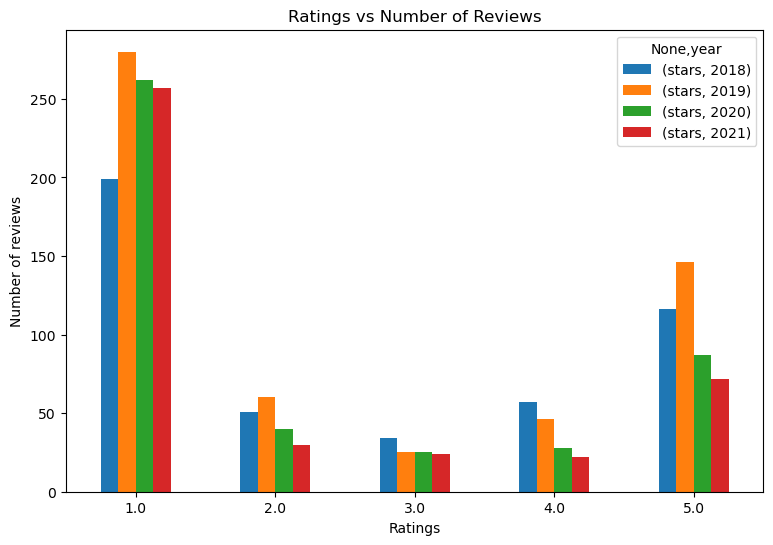

In [34]:
# Group by years and build out df for 2018-2021
df_by_year = sub.groupby(sub['year']).value_counts().to_frame().reset_index()

collection = df_by_year.loc[(df_by_year['year'] == 2018) |
              (df_by_year['year'] == 2019) |
              (df_by_year['year'] == 2020) |
              (df_by_year['year'] == 2021)]

# Drop columns
collection.drop(columns=['review_id','user_id', 
                         'business_id', 'date', 
                         'city', 'state', 'categories', 0, 'name'], inplace = True)

# Chart elements
chart = collection.groupby(collection['year'])['stars'].value_counts().to_frame()
chart = chart.unstack(level=0)

# Graph chart
chart.plot(kind='bar', rot=0, figsize=(9,6), title = "Ratings vs Number of Reviews", 
             xlabel = "Ratings", ylabel = 'Number of reviews', layout=(5,5));

#### Part A Response
> The data supports the statement by the Chief Data Scientist. We can see with this bar chart that the two highest bars are 1 stars followed by 5 stars. Ratings in the middle (2-4 stars) are the fewest.

#### Part B Response
>The data also supports the statement for all years from 2018 to 2021. In the bar chart for Ratings vs Number of Reviews for 2018-2021, we can see that ratings of 1 and 5 are abundant compared to 2, 3, and 4. Therefore, there is further evidence to support the statement by the Chief Data Scientist: “It is well known that customers make the effort to give a rating only when they are either extremely angry or absolutely delighted with the service.”

>As a consequence of that evidence, we can surmise that “online ratings are not reliable.”


### Question 5

Based on the insights generated from Questions 1 through 4, what would be your recommendation to John and the team (at most 100 words)? Your response should include, but may not be limited to the following:

- Is there cause for John to worry? Justify your answer.
- Is the target of 4.5/5 reasonable? If “yes,” justify your answer. If “no,” what do you think would be reasonable and why?
- Support your recommendations by quoting appropriate numbers computed from the data.

#### Question 5 Response
> From our analysis, it is clear that negative experiences elicit more of a response than satisfactory performances, as such, I recommend John’s team address selection bias and increase review participation. This will help the team get a proper understanding of their true performance. 

> **John’s worry**: There is little cause to worry because the lower average rating 
is not an accurate representation of their performance or indicates growing 
negative sentiment. The data indicates there are more reviews for the extremes, but 
few in between (selection bias in play). We observe 1,592 1-star reviews, 592 5-star reviews, and 1,239 for the rest combined.


> **4.5/5 target**: This is unreasonable based on previous data indicating that an increase in reviews led to a decline/plateau (around 3 stars). We can expect that an increase in ratings will revert Subway to its previous mean of around 3. Additionally, the average
rating for Subway is 2.6 with a standard deviation of 1.63, which adds to the unreasonableness.


### Bonus Question

What additional insight on ratings can you provide John?
- Please write a brief comment (at most 50 words).
- Support your argument with up to three data visualizations.



In [35]:
# Bring back original subway dataframe that has all years
sub_df = joined[joined['name'].str.contains('Subway')]

# Extract hour from date column and create new column using datetime
sub_df['hour'] = pd.DatetimeIndex(sub_df['date']).hour

In [36]:
# Groupby hours and find the count of reviews for each hour
graph = sub_df.groupby(sub_df['hour'])['stars'].count().to_frame()

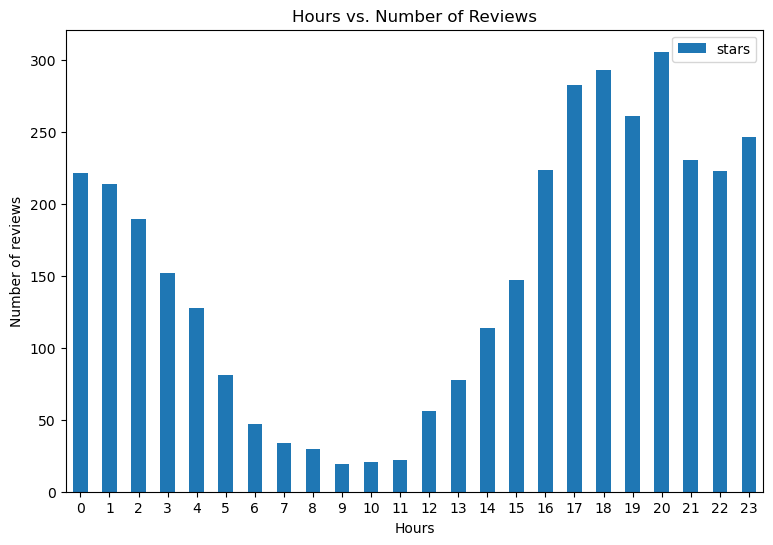

In [37]:
# Graph bar chart
graph.plot(kind='bar', rot=0, figsize=(9,6), title = "Hours vs. Number of Reviews", 
             xlabel = "Hours", ylabel = 'Number of reviews');

#### Bonus Question Response
> **Subway receives the most reviews around dinner time (5-8pm)** This can be observed by the bar graph: Hours vs. Number of Reviews, where we see a peak (high amount of reviews sent) at around dinner time (5-8pm). Understanding this management can train and incentivize employees to seek feedback and if needed, address negative experiences offline rather than a public forum.